In [7]:
import cohere
import pandas
from cohere.responses.classify import Example

import asyncio
import nest_asyncio
nest_asyncio.apply()

async def wait_60_seconds():
    print("Waiting for 60 seconds...")
    await asyncio.sleep(60)
    print("60 seconds have passed. Now executing the code.")
    # Your code goes here

colnames=['Date', 'Yak'] 
df = pandas.read_csv("database.csv", names=colnames, encoding='latin-1')


print(df)

import cohere  
co = cohere.Client('lfxcpYolQ2CfJlLYG1adfqIrDIDAB8JBuvNh7WrH')
responses = {}

# test = df.iloc[0]["Yak"]

# prompt = "Using only one of the following six words (sadness, happiness, fear, anger, surprise and disgust), rank this statement as one of the six basic emotions, outputting only one of those six words: " + test

# response = co.generate(  
#     model='command-nightly',  
#     prompt = prompt,  
#     max_tokens=200, # This parameter is optional. 
#     temperature=0.750)

# intro_paragraph = response.generations[0].text
# print(test)
# print(intro_paragraph)


count = 0
for index, row in df.iterrows():
  if count >= 5:
     asyncio.run(wait_60_seconds())
     count = 0

  prompt = "Rank this statement as one of the six basic emotions (sadness, happiness, fear, anger, surprise and disgust), outputting only one of those six words: " + row['Yak']
  try:
    response = co.generate(  
          model='command-nightly',  
          prompt = prompt,  
          max_tokens=200, # This parameter is optional. 
          temperature=0.750)
    intro_paragraph = response.generations[0].text
  except cohere.CohereError as e:
      print(e.message)
      print(e.http_status)
      print(e.headers)
      intro_paragraph = "error"
  responses[row['Yak']] = intro_paragraph
  print(row['Yak'], intro_paragraph)
  count += 1

print(responses)
df['emotion'] = df['Yak'].map(responses)

print(df)





          Date                                                Yak
0   2023-11-19  iï¿½m in the stay up too late, nap midday, sta...
1   2023-11-20                           The wind is brutal today
2   2023-11-21  no matter how tough these next two weeks are, ...
3   2023-11-22  this school has done such a piss poor job with...
4   2023-11-23  Coffee and period shitsï¿½ lord forgive me wha...
..         ...                                                ...
91  2023-11-19  does anywhere on grounds have desktops or othe...
92  2023-11-20                oh so now everyones coming to clark
93  2023-11-21  Does anyone know what an A is in calc 2? They ...
94  2023-11-22  Whats with all the trumpy and third party pos...
95  2023-11-23  why are none of my roommates back?? did i miss...

[96 rows x 2 columns]
You are using a Trial key, which is limited to 500 API calls / month. You can continue to use the Trial key for free or upgrade to a Production key with higher rate limits at 'https://d

KeyboardInterrupt: 

In [2]:
import string
df["cleaned"] = df['emotion'].str.strip()
df["cleaned"] = df['cleaned'].str.strip(string.punctuation)
df["cleaned"] = df['cleaned'].str.lower()


In [3]:
df

,Date,Yak,emotion,cleaned
0,2023-11-19,"iï¿½m in the stay up too late, nap midday, sta...",Sadness,sadness
1,2023-11-20,The wind is brutal today,Disgust,disgust
2,2023-11-21,"no matter how tough these next two weeks are, ...",Happiness,happiness
3,2023-11-22,this school has done such a piss poor job with...,Anger,anger
4,2023-11-23,Coffee and period shitsï¿½ lord forgive me wha...,Fear,fear
...,...,...,...,...
91,2023-11-19,does anywhere on grounds have desktops or othe...,Surprise,surprise
92,2023-11-20,oh so now everyones coming to clark,Surprise,surprise
93,2023-11-21,Does anyone know what an A is in calc 2? They ...,Surprise \nLet's break down why:\nThis statem...,surprise \nlet's break down why:\nthis stateme...
94,2023-11-22,Whats with all the trumpy and third party pos...,Surprise,surprise


<Axes: xlabel='cleaned'>

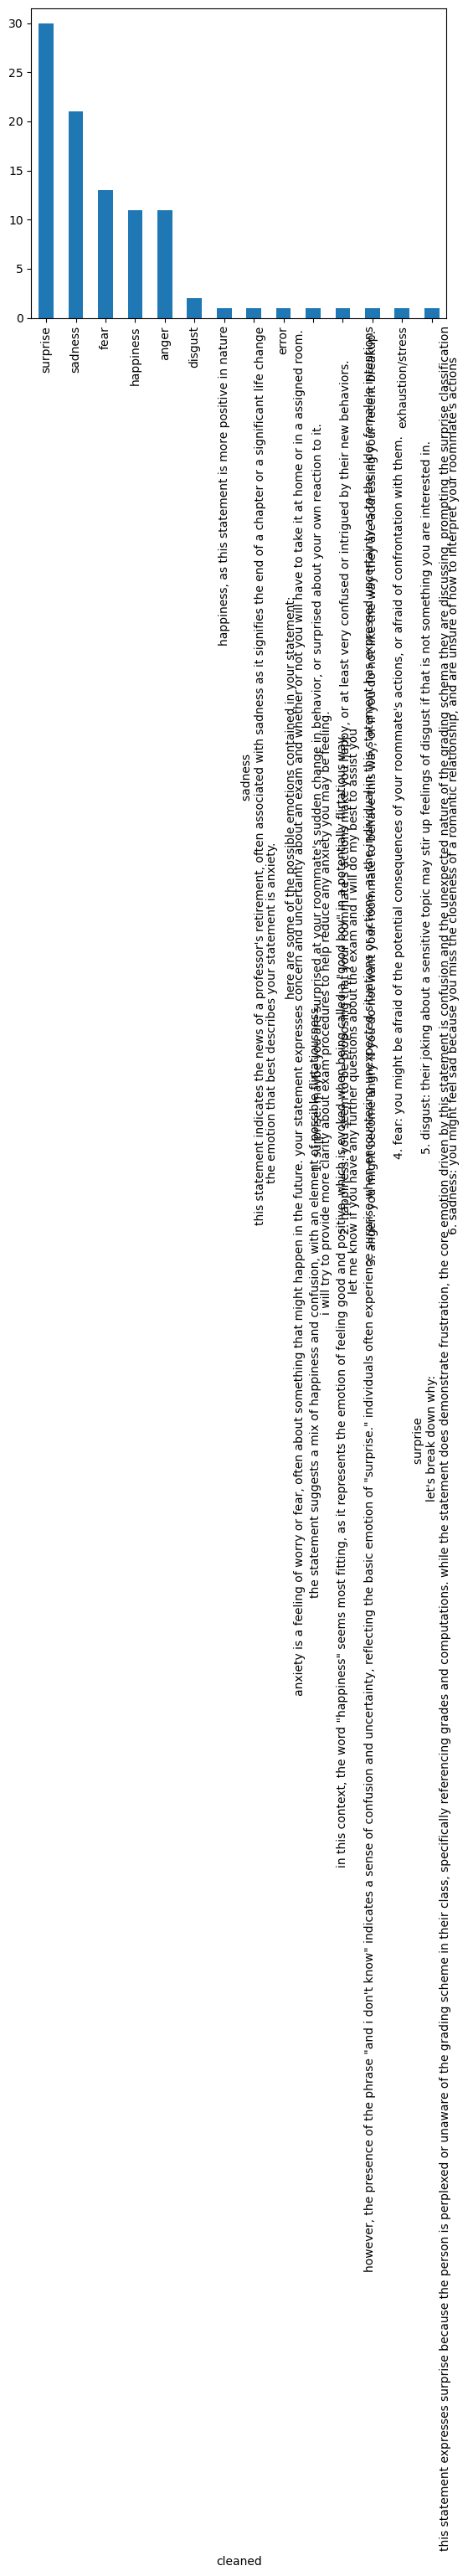

In [4]:
df.cleaned.value_counts().plot(kind='bar')

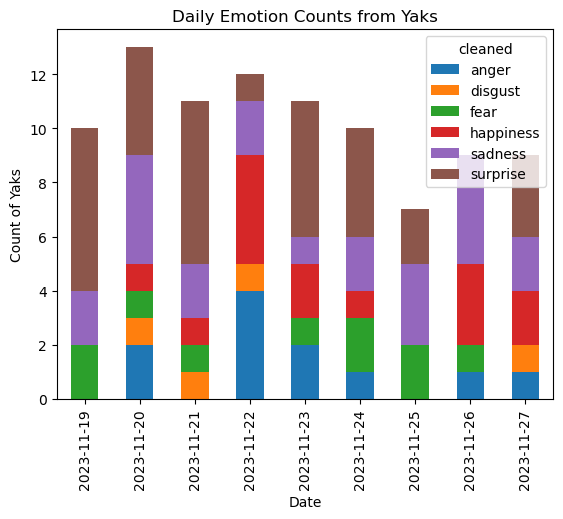

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Replace 'date_column', 'emotion_column' with your actual column names
# Group by date and emotion, then count the occurrences
df2 = df[df['cleaned'].map(len) < 12]
emotion_counts = df2.groupby(['Date', 'cleaned']).size().unstack(fill_value=0)


# Plotting
emotion_counts.plot(kind='bar', stacked=True)
plt.title('Daily Emotion Counts from Yaks')
plt.xlabel('Date')
plt.ylabel('Count of Yaks')
plt.show()